In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi
# Loading your IBM Q account(s)
provider = IBMQ.load_account()


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
backend = Aer.get_backend('qasm_simulator')
n=1 
seria=2048 

In [21]:
#Baza Z
ilosc = 1
A1 = 213
A2 = 289
A3 = 273
A4 = 283
k=A1+A2+A3+A4
k1 = k % 2
k2 = k % 4
k3 = k % 8
theta = pi/k2
fi = (2*pi)/k3
qp = QuantumRegister(ilosc)
cp = ClassicalRegister(ilosc) 
circuitP = QuantumCircuit(qp, cp) 
circuitP.u3(theta,0,0,qp[0]) 
circuitP.u1(fi,qp[0]) 
circuitP.measure(qp[0], cp[0]) 

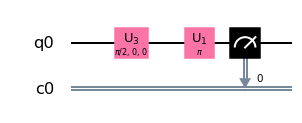

In [6]:
circuitP.draw(output='mpl') 

In [7]:
symulacja = execute(circuitP, backend, shots=seria)
wyniki = symulacja.result()
print(wyniki.get_counts(circuitP))

{'0': 1028, '1': 1020}


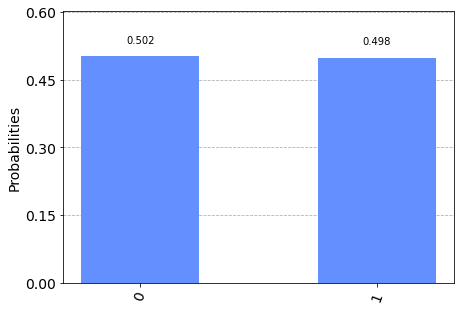

In [8]:
plot_histogram(wyniki.get_counts(circuitP))

In [9]:
#Sigma X
kwantowy = QuantumRegister(n) 
klasyczny = ClassicalRegister(n) 
circuitX = QuantumCircuit(kwantowy, klasyczny)
circuitX.u3(theta,0,0,kwantowy[0]) 
circuitX.u1(fi,kwantowy[0]) 
circuitX.h(kwantowy[0])
circuitX.measure(kwantowy[0], klasyczny[0])

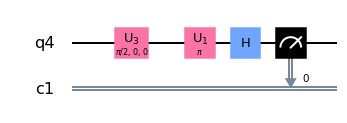

In [10]:
circuitX.draw(output='mpl')

In [11]:
job_simX = execute(circuitX, backend, shots=seria)
sim_resultX = job_simX.result()
print(sim_resultX.get_counts(circuitX))

{'1': 2048}


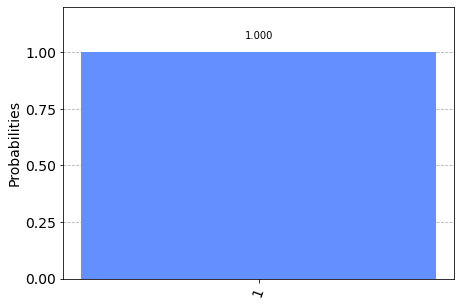

In [12]:
plot_histogram(sim_resultX.get_counts(circuitX))

In [17]:
kwy = QuantumRegister(n) 
kly = ClassicalRegister(n) 
circuitY = QuantumCircuit(kwy, kly)
circuitY.u3(theta,0,0,kwy[0]) 
circuitY.u1(fi,kwy[0]) 
circuitY.sdg(kwy[0])
circuitY.h(kwy[0])
circuitY.measure(kwy[0], kly[0])

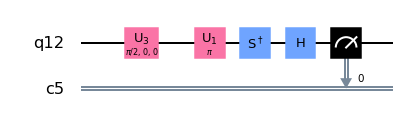

In [18]:
circuitY.draw(output='mpl')

In [19]:
job_simY = execute(circuitY, backend, shots=seria)
sim_resultY = job_simY.result()
print(sim_resultY.get_counts(circuitY))

{'0': 990, '1': 1058}


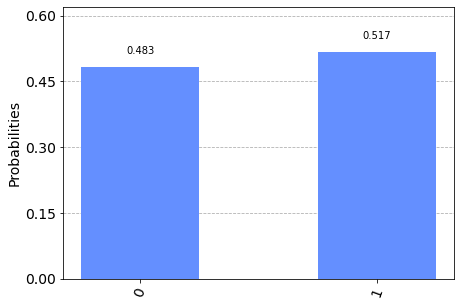

In [20]:
plot_histogram(sim_resultY.get_counts(circuitY))